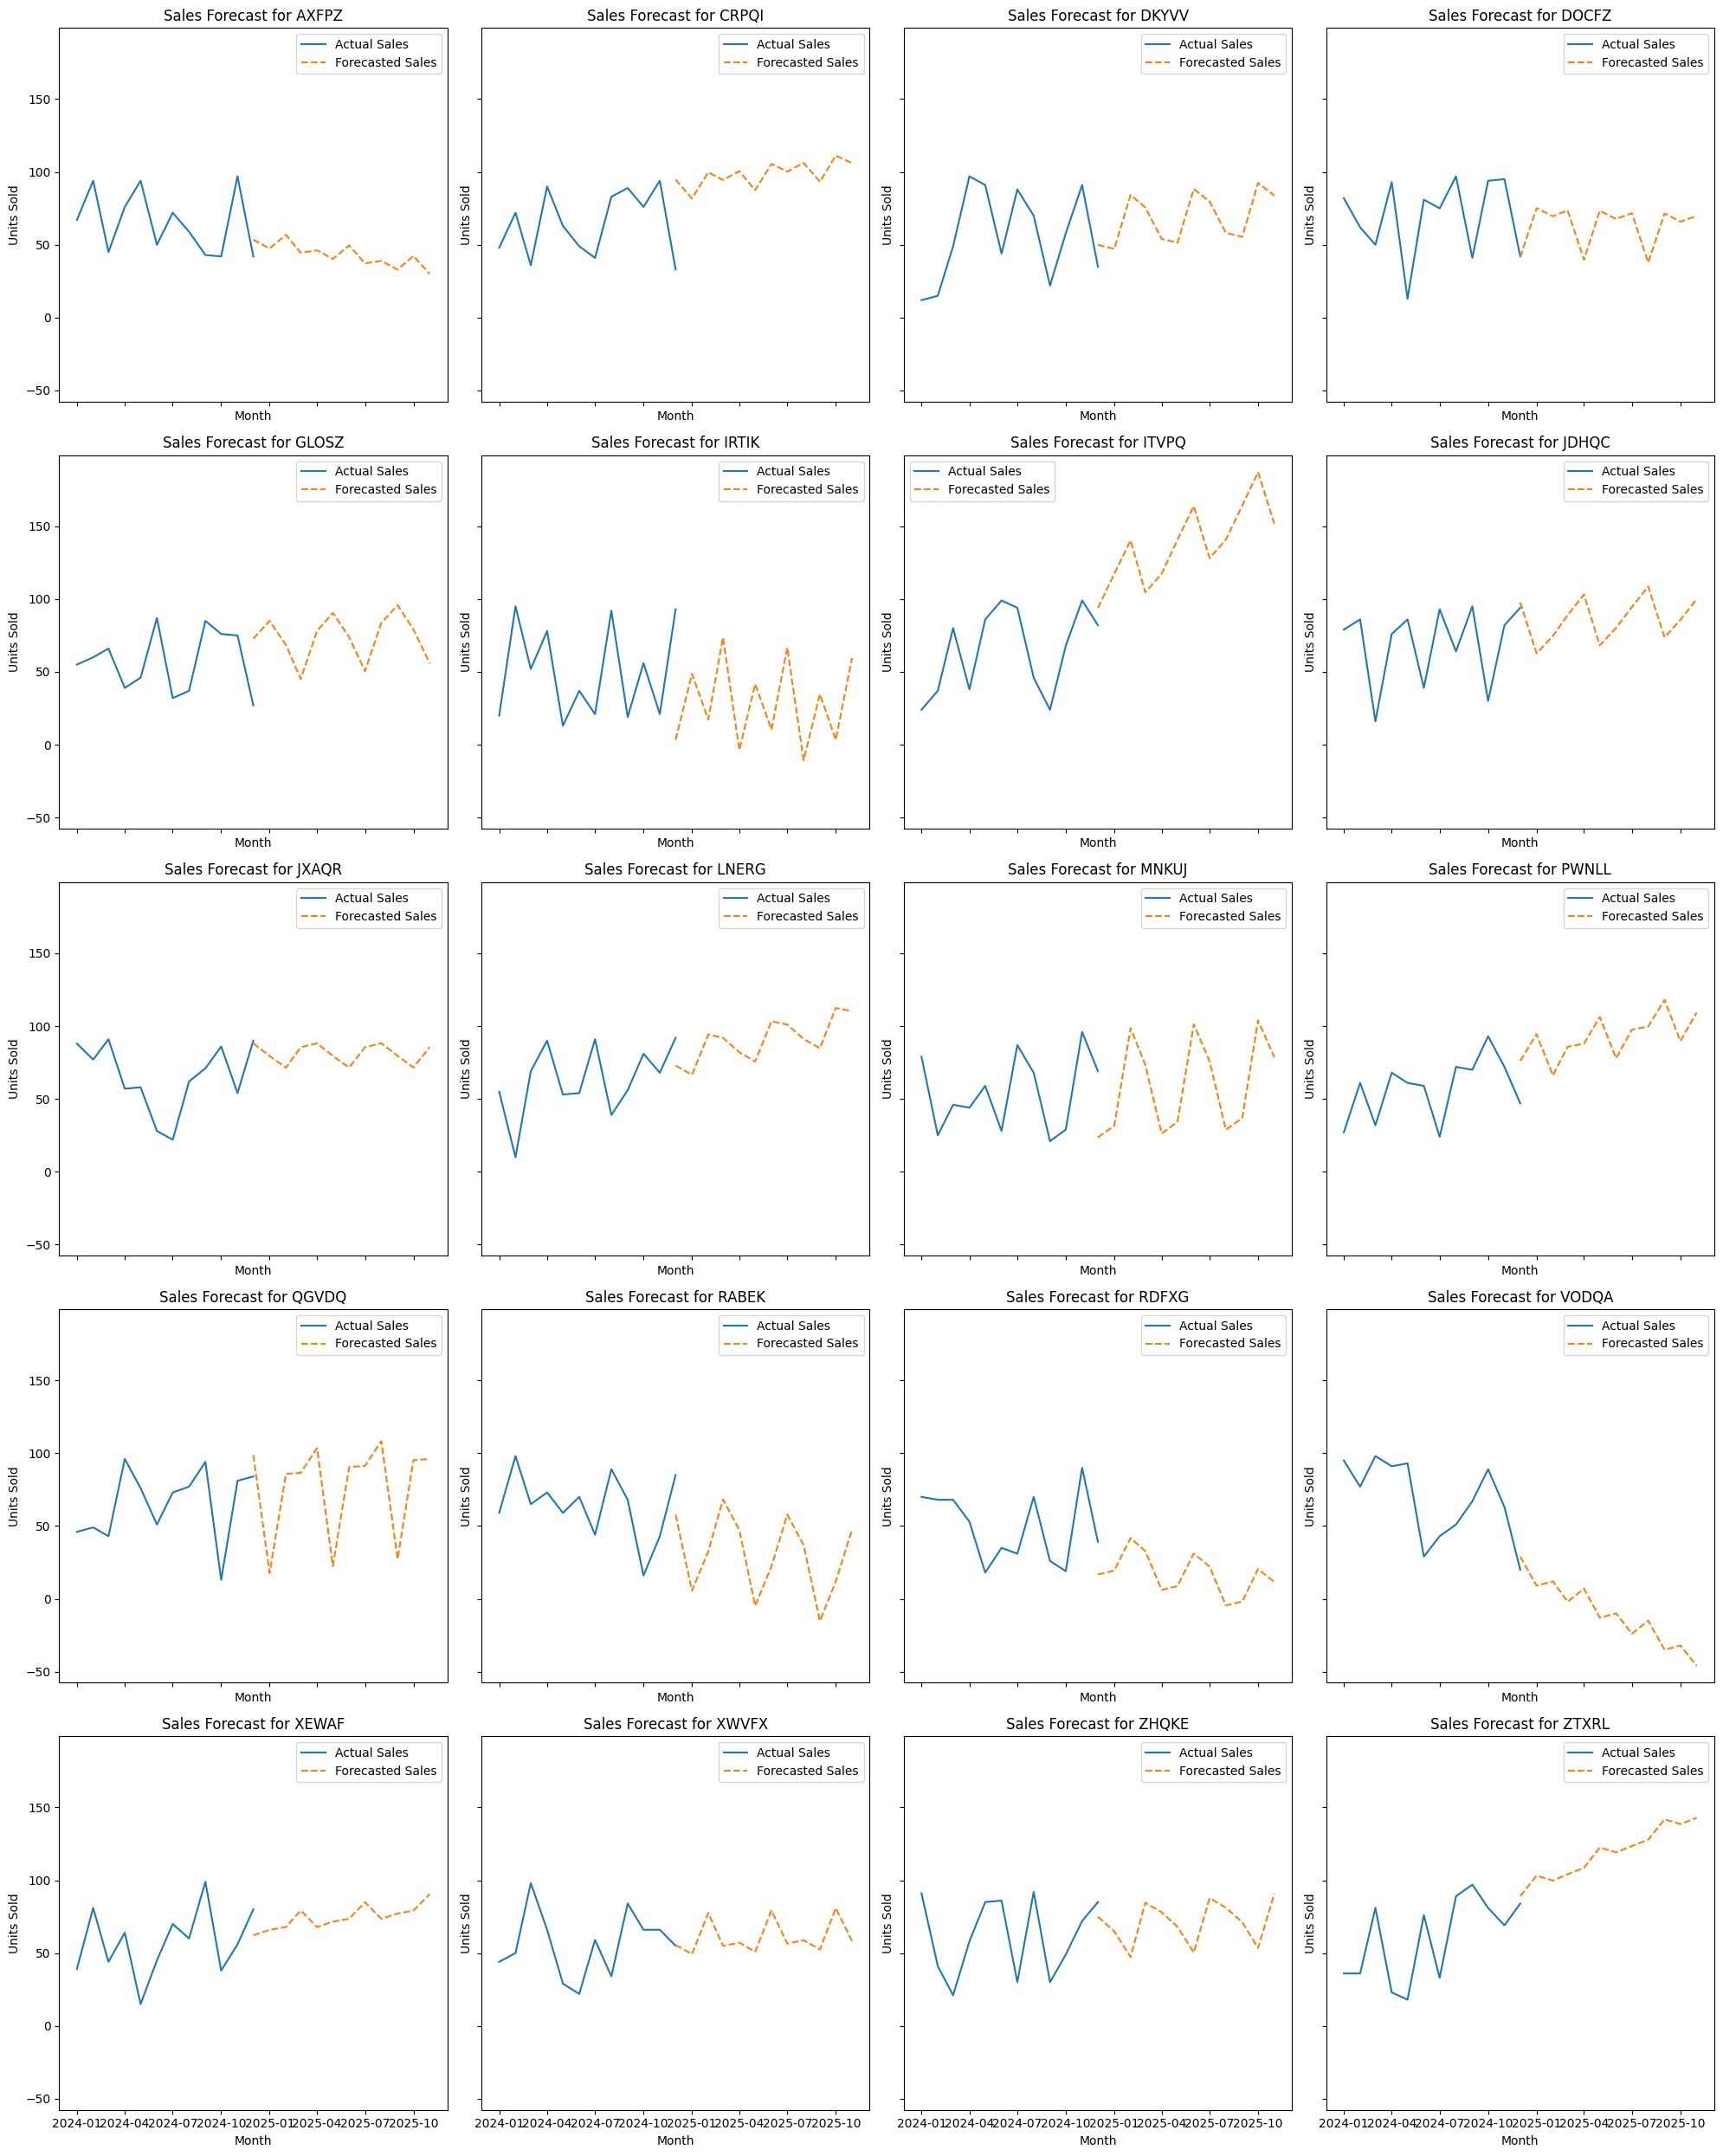

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the grocery store data
data_file_path = 'C:/Users/VARDHMAN/Downloads/UPDATED - GROCERY STORE DATA FINAL 2024.csv'
grocery_data = pd.read_csv(data_file_path)

# Assuming all data is for the year 2024
grocery_data['Year'] = 2024

# Combine 'Month' with 'Year'
grocery_data['Month'] = pd.to_datetime(grocery_data['Month'] + ' ' + grocery_data['Year'].astype(str), format='%B %Y', errors='coerce')

# Sort the data by 'Month'
grocery_data.sort_values('Month', inplace=True)

# Aggregate sales data by product and month
monthly_sales_one_year = grocery_data.pivot_table(index='Month', columns='Product Number', values='Units Sold', aggfunc='sum').fillna(0)
monthly_sales_one_year = monthly_sales_one_year.asfreq('MS')

# Product codes from the image
product_list = [
    'AXFPZ', 'CRPQI', 'DKYVV', 'DOCFZ', 'GLOSZ', 'IRTIK', 'ITVPQ',
    'JDHQC', 'JXAQR', 'LNERG', 'MNKUJ', 'PWNLL', 'QGVDQ', 'RABEK',
    'RDFXG', 'VODQA', 'XEWAF', 'XWVFX', 'ZHQKE', 'ZTXRL'
]

# Create a 5x4 subplot layout
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through the products and their respective axes to plot each one
for ax, product_name in zip(axs, product_list):
    product_sales = monthly_sales_one_year[product_name]
    
    # Setting up and fitting the Holt-Winters model
    model = ExponentialSmoothing(product_sales, trend="add", seasonal="add", seasonal_periods=4, use_boxcox=False)
    hw_fit = model.fit()

    # Forecasting the next 12 months
    forecast = hw_fit.forecast(12)

    # Plotting the actual vs forecasted sales
    ax.plot(product_sales.index, product_sales, label='Actual Sales')
    ax.plot(pd.date_range(product_sales.index[-1], periods=12, freq='MS'), forecast, label='Forecasted Sales', linestyle='--')
    ax.set_title(f'Sales Forecast for {product_name}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Units Sold')
    ax.legend()

# Adjust the layout
plt.tight_layout()
plt.show()
